# Práctica - Predicción de supervivencia del Titanic en Python - Proyecto de aprendizaje automático


Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/competitions/titanic

También se pueden consultar todas las bases de datos de este curso en GitHub: https://github.com/HugoBrandonHc/MachineLearing_DATA/tree/main

Lenguaje a utilizar - Python

### Objetivo del proyecto:
    1. Análisis de datos exploratorios(EDA)
        1.1 Análisis de las caracteristicas.
        1.2 Encontrar cualquier relacón o tendencia entre los datos
    2. Procesamiento y limpieza de datos:
        1.1 Agregar algunas caracteriscias
        1.2 Eliminación de caracterisicas redundantes.
        1.3 Convertir caracteristicas en forma adecuada para obtener resultados.
    3. Validar con Kaggle para ver cuanto puntaje sacamos con nuestro modelo en la competencia de este proyecto

### Pasos de este estudio:
    1. Carga de datos
    2. Análisis de datos exploratorios(EDA)
    3. Procesamiento y limpieza de datos
    4. Modelos y Ajuste
    5. Evaluación de los modelos
    6. Evaluacion con el test set
    7. Conclusión con KAGGLE y próximos pasos

## <span style="color:Green">1. Carga de datos</span>

In [4]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Definimos una funcion para extraer los datos
train_csv= "https://raw.githubusercontent.com/HugoBrandonHc/MachineLearing_DATA/main/Titanic_ML_From_Disaster/train.csv"

# Definimos nuestras bases de datos
data = pd.read_csv(train_csv)

In [6]:
#Visualizamos el dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Antes de comenzar con el analisis exploratorio de datos podemos preguntarnos cual es nuestra variable objetivo ( La idea es donde quiero llevar el proyecto, y hacernos
preguntas sobre lo que quiero averiguar como: ¿Que personas sobrevivieron y cuales motivos?

In [7]:
#Variable Objetivo: Survived

## <span style="color:Green">2.  Análisis de datos exploratorios(EDA)</span>

In [8]:
#Revisar la cantidad de valores nulos dentro de mi dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Cantidad de Sobrevivientes')

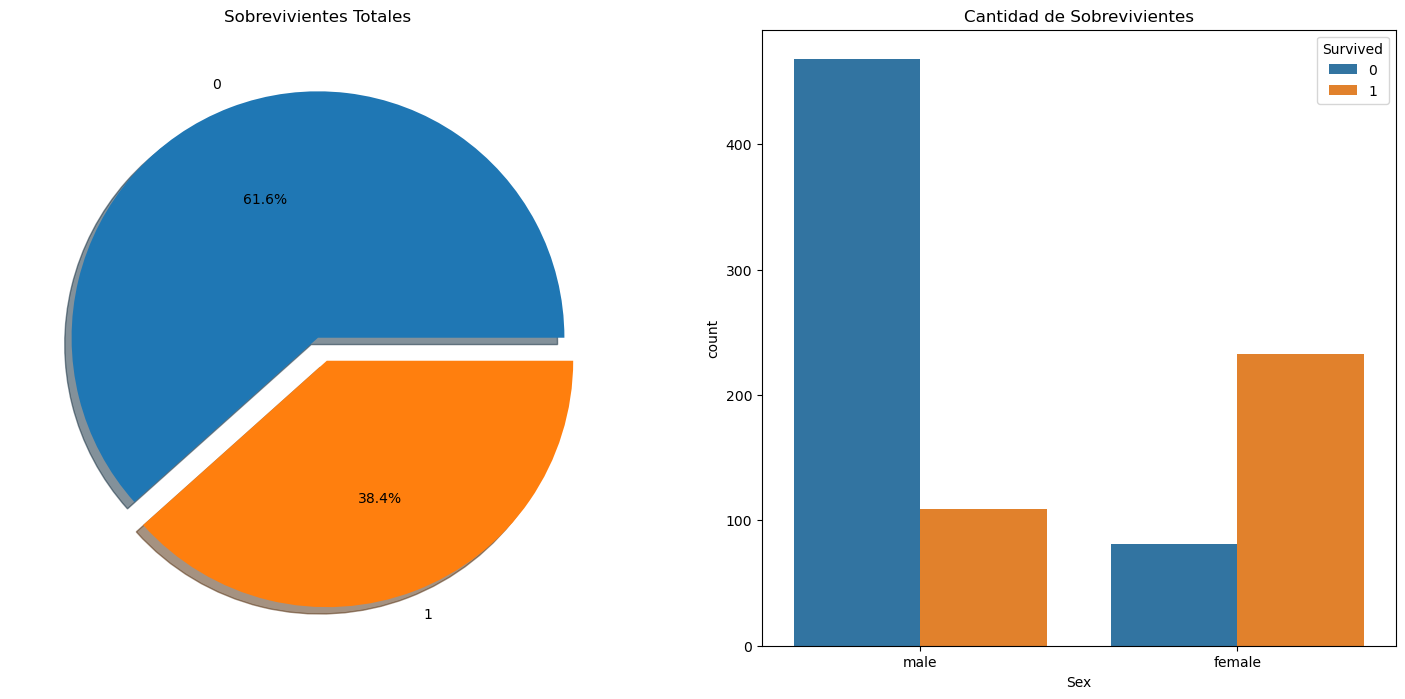

In [10]:
#Evaluamos cual fue la taza de diferencia para ver si todas las columnas son importantes para realizar nuestro estudio
f, ax = plt.subplots(1,2, figsize= (18,8))

data['Survived'].value_counts().plot.pie(autopct= '%1.1f%%' , ax= ax[0], explode = [0, 0.1], shadow = True)
ax[0].set_title('Sobrevivientes Totales')
ax[0].set_ylabel('')


sns.countplot(x='Sex', hue='Survived', data= data,  ax = ax[1])
ax[1].set_title('Cantidad de Sobrevivientes')


### 2.1 Análisis de Características

### Como buenos analistas que somos, determinamos que las variables que queremos trabajar que serían:

    Survived
    Sex
    Age
    Pclass

#### Caracteristicas categóricas: (SEX)
    Una variable categórica es aquella que tiene dos más categorías y cada valor en esa característica puede clasificarse por ellas. Por ejemplo, el género es una variable categórica 
    que tiene dos categorías (masculina y feminina). No podemos dar ningún orden a tales variables, Tambien se conocen como variables nominales.
#### Caracteristicas ordinales: (PClass)
    Una variable ordinal es similar al os valores categóricos, pero la diferencia entre ellos es que podemos tener una ordenación relativa entre los valores. Por ejemplo: si tenemos una 
    caracteistica como Altura,Medio,Corto, entonces Altura es una variable ordinal.Aqui podemos tener una ordenacion relativa en la variable.
    
#### Caracteristicas continua: (Age) (Fare)
    Las caracteristicas son continuas cuando puede tomar valores entre dos puntos o entre los valores mínimos o máximos en la columna de características.

In [11]:
# Analisando variable catagorica SEX

#Vemos la cantidad de pasajeros y los podemos separarlos por SEX
data["PassengerId"].count()

891

In [13]:
#Vemos la cantidad de personas que sobrevivieron(1) y no sobreviviendo(0)
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
#Agrupamos los datos por Sex y Surivived de forma numerica y le agregame una columna [Survived]
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

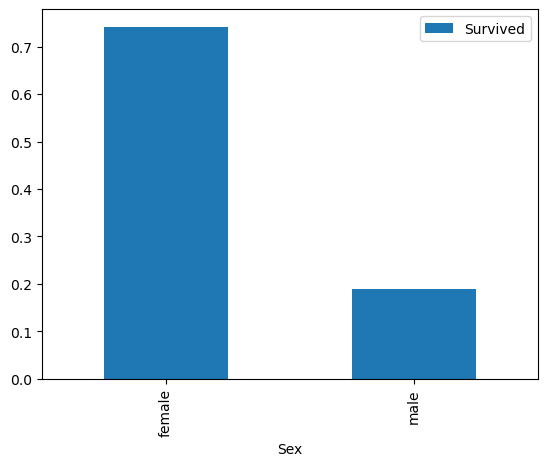

In [15]:
#Realizamos un gráfico con el promedio de mujeres y hombres y supervivencia
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

Con este gráfico podemos observar que mas del 70% mujeres sobreviviendo y de los hombres solo el 18%, es curioso porque el numero de hombres era mayor que el de las mujeres en el barco.

In [16]:
#Analizando variable ordinal PClass
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Clase')

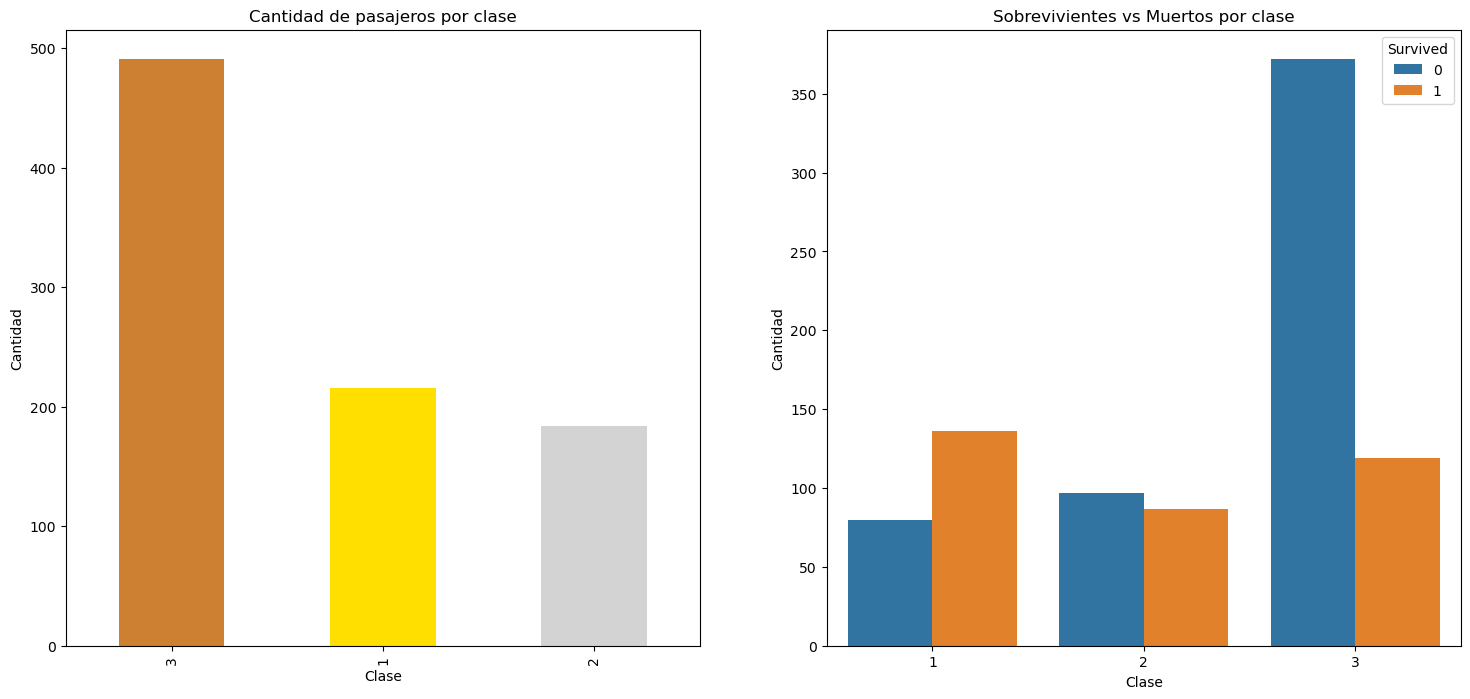

In [17]:
f , ax = plt.subplots(1,2, figsize= (18,8))

data['Pclass'].value_counts().plot.bar(ax = ax[0], color= ['#CD7F32','#FFDF00','#D3D3D4'])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')
ax[0].set_xlabel('Clase')

sns.countplot(x='Pclass',hue='Survived', data = data, ax=ax[1])
ax[1].set_title('Sobrevivientes vs Muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase')

Sacamos un analisis de estos graficas que nos indican que la primera clase hubo menos cantidad de muerto, mientras que en la tercera clase se registro mas muertos, en este clase hubo la mayor cantidad de pasajeros, con este analisis podemos determinar que la clase si importaba al momento del rescate.

In [18]:
#Analizamos la tasa de supervivencia según sexo y clase
pd.crosstab([data['Sex'],data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

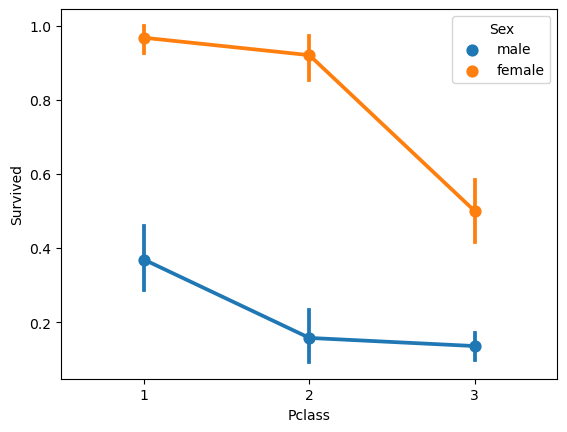

In [19]:
#Un grafico que nos ayuda a visualizar mejor estos datos: Factor
sns.pointplot(data=data, x='Pclass',y='Survived',hue='Sex')
plt.show()

In [20]:
#Analizando la columna el precio del pasaje (característica continua)
print("El pasaje mas caro: ", data['Fare'].max())
print("El pasaje mas barato", data['Fare'].min())
# EL pasaje mas caro fue de 512, y el mas barato fue gratis ( JACK ES REAL)

El pasaje mas caro:  512.3292
El pasaje mas barato 0.0


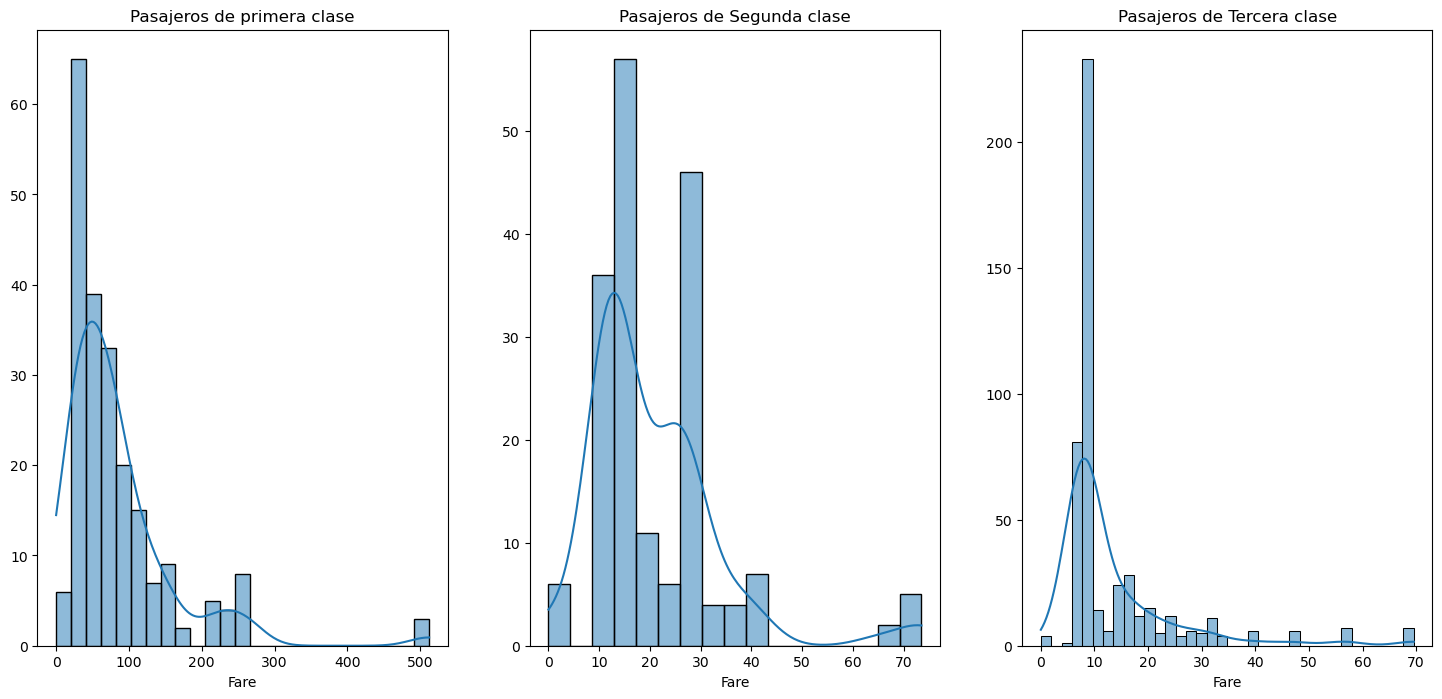

In [21]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))

sns.histplot(data[data['Pclass']==1]['Fare'], kde=True, ax = ax[0])
ax[0].set_title('Pasajeros de primera clase')
ax[0].set_ylabel('')

sns.histplot(data[data['Pclass']==2]['Fare'], kde=True, ax = ax[1])
ax[1].set_title('Pasajeros de Segunda clase')
ax[1].set_ylabel('')

sns.histplot(data[data['Pclass']==3]['Fare'], kde=True, ax = ax[2])
ax[2].set_title('Pasajeros de Tercera clase')
ax[2].set_ylabel('')

plt.show()


## <span style="color:Green">3. Procesamiento y limpieza de datos</span>

In [23]:
#Primero arreglemos el problema con la caracteristica de Edad:
#Usaremos bining o normalización para seleccionar rangos en nuestra variable:
data['rango_edad'] = 0

data.loc[data['Age'] <=16, 'rango_edad'] = 0
data.loc[ (data['Age'] >16) & (data['Age']<=32) , 'rango_edad' ] = 1
data.loc[ (data['Age'] >32) & (data['Age']<=48) , 'rango_edad' ] = 2
data.loc[ (data['Age'] >48) & (data['Age']<=64) , 'rango_edad' ] = 3
data.loc[data['Age'] > 64, 'rango_edad'] = 4

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [24]:
#comprobar el numero de pasajeros en cada grupo
data['rango_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,rango_edad
1,346
0,277
2,188
3,69
4,11


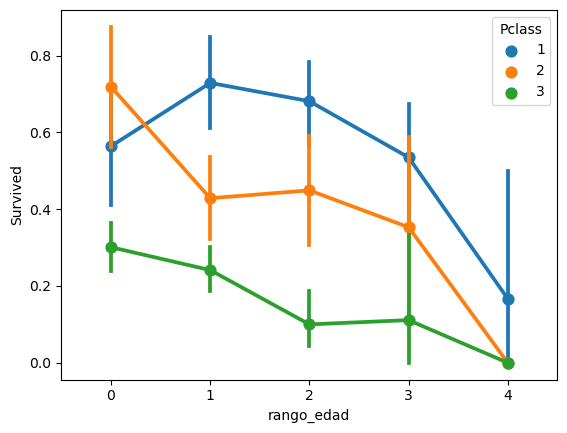

In [25]:
#Observamos graficamente los supervivientes en su rango de edad y de acuerdo a su clase
sns.pointplot(data=data, x='rango_edad',y='Survived', hue='Pclass')
plt.show()

In [26]:
#Ahora arreglemos la caracteristica del pasaje
#cortamos los datos
data['rango_pasaje'] = pd.qcut(data['Fare'],4)

In [27]:
#Aqui obtenemos le promedio de registros de cada caterogia, se puede aplicar otras funciones como sum(), count().
data.groupby(['rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


La función corte nos permitio conocer los rangos exactos de cada intervalo, por lo que ahora podemos asignar cada registro del DataFrame a su tramo correspondiente.

In [28]:
data['categoria_pasaje']= 0

data.loc[data['Fare'] <= 7.91, 'categoria_pasaje'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <=14.454), 'categoria_pasaje'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <=31.0), 'categoria_pasaje'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <=512.329), 'categoria_pasaje'] = 3

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",1


<Axes: xlabel='categoria_pasaje', ylabel='Survived'>

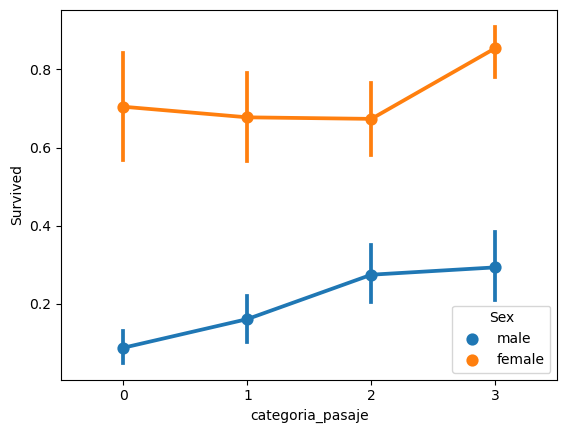

In [30]:
sns.pointplot(data=data, x='categoria_pasaje', y='Survived', hue = 'Sex')

Podemos observar que las mujeres tienen una tasa mas del 80%  de supervivencia por el pago de su pasaje mas caro, al igual que los hombres quienes pagaron su pasaje mas alto tambien tienen una taza de mas del 25% porciento de supervivencia. (El que pago mas caro tenia mas posibilidad de sobrevivir)

In [31]:
#Limpiemos los datos (Borramos las columnas que no sirven y Convertir valores Objet  valores númericos
data.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','rango_pasaje'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_edad,categoria_pasaje
0,0,3,male,1,0,S,1,0
1,1,1,female,1,0,C,2,3
2,1,3,female,0,0,S,1,1
3,1,1,female,1,0,S,2,3
4,0,3,male,0,0,S,2,1


In [32]:
#Observamos que variables importanes como  sexo y embarked son objetos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Survived          891 non-null    int64 
 1   Pclass            891 non-null    int64 
 2   Sex               891 non-null    object
 3   SibSp             891 non-null    int64 
 4   Parch             891 non-null    int64 
 5   Embarked          889 non-null    object
 6   rango_edad        891 non-null    int64 
 7   categoria_pasaje  891 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 55.8+ KB


In [33]:
#transformemos a numericos como SEX Y Embarked
dummy_encoded = pd.get_dummies(data)

In [34]:
dummy_encoded.head()

,Survived,Pclass,SibSp,Parch,rango_edad,categoria_pasaje,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,1,0,0,1,0,0,1
1,1,1,1,0,2,3,1,0,1,0,0
2,1,3,0,0,1,1,1,0,0,0,1
3,1,1,1,0,2,3,1,0,0,0,1
4,0,3,0,0,2,1,0,1,0,0,1


In [35]:
dummy_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Survived          891 non-null    int64
 1   Pclass            891 non-null    int64
 2   SibSp             891 non-null    int64
 3   Parch             891 non-null    int64
 4   rango_edad        891 non-null    int64
 5   categoria_pasaje  891 non-null    int64
 6   Sex_female        891 non-null    uint8
 7   Sex_male          891 non-null    uint8
 8   Embarked_C        891 non-null    uint8
 9   Embarked_Q        891 non-null    uint8
 10  Embarked_S        891 non-null    uint8
dtypes: int64(6), uint8(5)
memory usage: 46.2 KB


In [36]:
dummy_encoded.isna().sum()

Survived            0
Pclass              0
SibSp               0
Parch               0
rango_edad          0
categoria_pasaje    0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64

In [37]:
#Guardamos nuestra data limpia a un archivo csv
data.to_csv("data_limpia.csv")

In [38]:
#tambien a un archivo excel
data.to_excel("data_limpia.xlsx")

## <span style="color:Green">4. Modelos y ajuste</span>

Vamos a probar algunos modeos de ajuste como:
    - Regresion Logistica
    - Regresion LIneal
    - Arbol de Decision
    - Bosque Aleatorio
    

In [39]:
#Estos serian los datos que vamos a usar para hacer los modelos
dummy_encoded.head()

,Survived,Pclass,SibSp,Parch,rango_edad,categoria_pasaje,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,1,0,0,1,0,0,1
1,1,1,1,0,2,3,1,0,1,0,0
2,1,3,0,0,1,1,1,0,0,0,1
3,1,1,1,0,2,3,1,0,0,0,1
4,0,3,0,0,2,1,0,1,0,0,1


In [40]:
#Variable dependiente
x= dummy_encoded.drop("Survived",axis=1)
#variables restantes
y= dummy_encoded["Survived"]
#Seleccionamos por ejemplo el 20% de los datos para el set de prueba random
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(x,y, test_size=0.2)

In [41]:
print(X_entrenamiento.shape, Y_entrenamiento.shape)

(712, 10) (712,)


In [42]:
#Entrenando modelo de regresión logistica:

from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression()
log_reg.fit(X_entrenamiento,Y_entrenamiento)

LogisticRegression()

In [43]:
print('Accuracy:',log_reg.score(X_entrenamiento,Y_entrenamiento))

Accuracy: 0.7893258426966292


In [44]:
#Entrenando modelo con Arbol de regression
from sklearn.tree import DecisionTreeRegressor
reg_arbol = DecisionTreeRegressor()
reg_arbol.fit(X_entrenamiento,Y_entrenamiento)

DecisionTreeRegressor()

In [45]:
print('Accuracy:',reg_arbol.score(X_entrenamiento,Y_entrenamiento))

Accuracy: 0.6882526777547437


In [46]:
#Entrenando con arbol de decision
from sklearn.tree import DecisionTreeClassifier
tree_clasi = DecisionTreeClassifier()
tree_clasi = tree_clasi.fit(X_entrenamiento,Y_entrenamiento)

In [47]:
print('Accuracy:',tree_clasi.score(X_entrenamiento,Y_entrenamiento))

Accuracy: 0.8890449438202247


In [48]:
#Entrenando modelo con RandomFOrestRegresor
from sklearn.ensemble import RandomForestRegressor
modelo_forest =  RandomForestRegressor()
modelo_forest.fit(X_entrenamiento,Y_entrenamiento)

RandomForestRegressor()

In [49]:
print('Accuracy:',modelo_forest.score(X_entrenamiento,Y_entrenamiento))

Accuracy: 0.6703192404418324


  ## <span style="color:Green">5. Evaluación de los modelos</span> 

In [50]:
#Evaluacion de modelo de regresión logistica
y_prediccion = log_reg.predict(X_prueba)
y_prediccion

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [51]:
#Evlacuon de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_prueba, y_prediccion)
cm

array([[98, 16],
       [24, 41]], dtype=int64)

In [52]:
#Evaluacion de modelo con arbol de regresionl:
y_predic = reg_arbol.predict(X_prueba).round()
y_predic

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [53]:
#Evlacuon de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_prueba, y_predic)
cm

array([[103,  11],
       [ 27,  38]], dtype=int64)

In [54]:
#Evaluacion Arbol de decision
y_pred = tree_clasi.predict(X_prueba)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [55]:
#Evlacuon de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_prueba, y_pred)
cm

array([[102,  12],
       [ 27,  38]], dtype=int64)

In [56]:
#Evaluacion Arbol de random forest
y_predi = modelo_forest.predict(X_prueba).round()
y_predi

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [57]:
#Evlacuon de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_prueba, y_predi)
cm

array([[99, 15],
       [24, 41]], dtype=int64)

Parece que el modelo de arbol de decion es el mejor modelo para la predicción, recordemos que todo esto lo estamos haciendo con los datos del mismo modelo de entrenamiento, lo mas correcto es hacer la evaluacion sobre el test SET,
que nos compartieron en el concurso de KAGGLE , tambien iremos a evalular el puntaje de nuestro modelo con ellos ya que esa es la idea de este proyecto.

  ## <span style="color:Green">6. Evaluación de los modelos</span> 

Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validacion los datos que usamos de entrenamiento. Por lo tanto, la estimacion del error seria sesgada y tendria poca capacidad de generalizacion.

Por eso ahora usaremos el test set. Sim embargo. Kaggle no nos regresa el valor real del test set, para verificarlo tenemos que enviar nuestros resultados y mirar el score que pone kaggle:

In [80]:
# Definimos una funcion para extraer los datos
data_test = pd.read_csv("test.csv")
test_ids = data_test["PassengerId"]

# Definimos nuestras bases de datos


In [81]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [84]:
#Primero arreglemos el problema con la caracteristica de Edad:
#Usaremos bining o normalización para seleccionar rangos en nuestra variable:
data_test['rango_edad'] = 0

data_test.loc[data_test['Age'] <=16, 'rango_edad'] = 0
data_test.loc[ (data_test['Age'] >16) & (data_test['Age']<=32) , 'rango_edad' ] = 1
data_test.loc[ (data_test['Age'] >32) & (data_test['Age']<=48) , 'rango_edad' ] = 2
data_test.loc[ (data_test['Age'] >48) & (data_test['Age']<=64) , 'rango_edad' ] = 3
data_test.loc[data_test['Age'] > 64, 'rango_edad'] = 4

data_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_edad
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [85]:
#Ahora arreglemos la caracteristica del pasaje
#cortamos los datos
data_test['rango_pasaje'] = pd.qcut(data_test['Fare'],4)

In [86]:
#Aqui obtenemos le promedio de registros de cada caterogia, se puede aplicar otras funciones como sum(), count().
data_test.groupby(['rango_pasaje'])['Pclass'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Pclass
rango_pasaje,
"(-0.001, 7.896]",2.964912
"(7.896, 14.454]",2.562500
"(14.454, 31.5]",2.152381
"(31.5, 512.329]",1.313725


In [87]:
data_test['categoria_pasaje']= 0

data_test.loc[data_test['Fare'] <= 7.91, 'categoria_pasaje'] = 0
data_test.loc[(data_test['Fare'] > 7.91) & (data_test['Fare'] <=14.454), 'categoria_pasaje'] = 1
data_test.loc[(data_test['Fare'] > 14.454) & (data_test['Fare'] <=31.0), 'categoria_pasaje'] = 2
data_test.loc[(data_test['Fare'] > 31.0) & (data_test['Fare'] <=512.329), 'categoria_pasaje'] = 3

In [88]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       418 non-null    int64   
 1   Pclass            418 non-null    int64   
 2   Name              418 non-null    object  
 3   Sex               418 non-null    object  
 4   Age               332 non-null    float64 
 5   SibSp             418 non-null    int64   
 6   Parch             418 non-null    int64   
 7   Ticket            418 non-null    object  
 8   Fare              417 non-null    float64 
 9   Cabin             91 non-null     object  
 10  Embarked          418 non-null    object  
 11  rango_edad        418 non-null    int64   
 12  rango_pasaje      417 non-null    category
 13  categoria_pasaje  418 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 43.2+ KB


In [89]:
#Limpiemos los datos (Borramos las columnas que no sirven y Convertir valores Objet  valores númericos
data_test.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','rango_pasaje'], axis=1, inplace=True)
data_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,rango_edad,categoria_pasaje
0,3,male,0,0,Q,2,0
1,3,female,1,0,S,2,0
2,2,male,0,0,Q,3,1
3,3,male,0,0,S,1,1
4,3,female,1,1,S,1,1


In [90]:
#transformemos a numericos como SEX Y Embarked
dummy_encoded = pd.get_dummies(data_test)
dummy_encoded.head()

,Pclass,SibSp,Parch,rango_edad,categoria_pasaje,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,2,0,0,1,0,1,0
1,3,1,0,2,0,1,0,0,0,1
2,2,0,0,3,1,0,1,0,1,0
3,3,0,0,1,1,0,1,0,0,1
4,3,1,1,1,1,1,0,0,0,1


In [92]:
dummy_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Pclass            418 non-null    int64
 1   SibSp             418 non-null    int64
 2   Parch             418 non-null    int64
 3   rango_edad        418 non-null    int64
 4   categoria_pasaje  418 non-null    int64
 5   Sex_female        418 non-null    uint8
 6   Sex_male          418 non-null    uint8
 7   Embarked_C        418 non-null    uint8
 8   Embarked_Q        418 non-null    uint8
 9   Embarked_S        418 non-null    uint8
dtypes: int64(5), uint8(5)
memory usage: 18.5 KB


In [93]:
#lo añadimos con otro nombre
X_final_data = dummy_encoded

In [94]:
X_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Pclass            418 non-null    int64
 1   SibSp             418 non-null    int64
 2   Parch             418 non-null    int64
 3   rango_edad        418 non-null    int64
 4   categoria_pasaje  418 non-null    int64
 5   Sex_female        418 non-null    uint8
 6   Sex_male          418 non-null    uint8
 7   Embarked_C        418 non-null    uint8
 8   Embarked_Q        418 non-null    uint8
 9   Embarked_S        418 non-null    uint8
dtypes: int64(5), uint8(5)
memory usage: 18.5 KB


In [95]:
#Comenzamos con las preddiciones para el test
prediciones_reg_arbol = reg_arbol.predict(X_final_data).round()
print(prediciones_reg_arbol[0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [103]:
predicciones_log_reg = log_reg.predict(X_final_data).round()
print(predicciones_log_reg[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [96]:
prediciones_modelo_forest = modelo_forest.predict(X_final_data).round()
print(prediciones_modelo_forest[0:10])

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


In [97]:
prediciones_tree_clasi = tree_clasi.predict(X_final_data)
print(prediciones_tree_clasi[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [104]:
#comparamos predicciones
print(prediciones_reg_arbol[0:20])
print(predicciones_log_reg[0:20])
print(prediciones_modelo_forest[0:20])
print(prediciones_tree_clasi[0:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0]


In [120]:
# para descargar en ordenador 
def download_output(predicciones, name):
    output = pd.DataFrame({'PassengerId': test_ids.values, 
                            'Survived': predicciones})
    output.to_csv(name, index=False)

In [121]:
download_output(prediciones_reg_arbol, 'hugo_pred_log.csv')

In [122]:
download_output(predicciones_log_reg, 'hugo_log_reg.csv')

In [123]:
download_output(prediciones_modelo_forest, 'hugo_modelo_forest.csv')

In [124]:
download_output(prediciones_tree_clasi, 'hugo_modelo_tree_clasi.csv')

## <span style="color:Green"> 7. Conclusión con KAGGLE y próximos pasos</span> 

### Luego de hacer el envio a kaggle:
    Los modelos ganadores resultaron ser la Regresión Logistica y el arcbol de  DecisionTreeClassifier.
    (NO MUESTRO LOS OTROS RESULTADOS DE LOS MODELOS PORQUE SALIERON MUY MALOS)
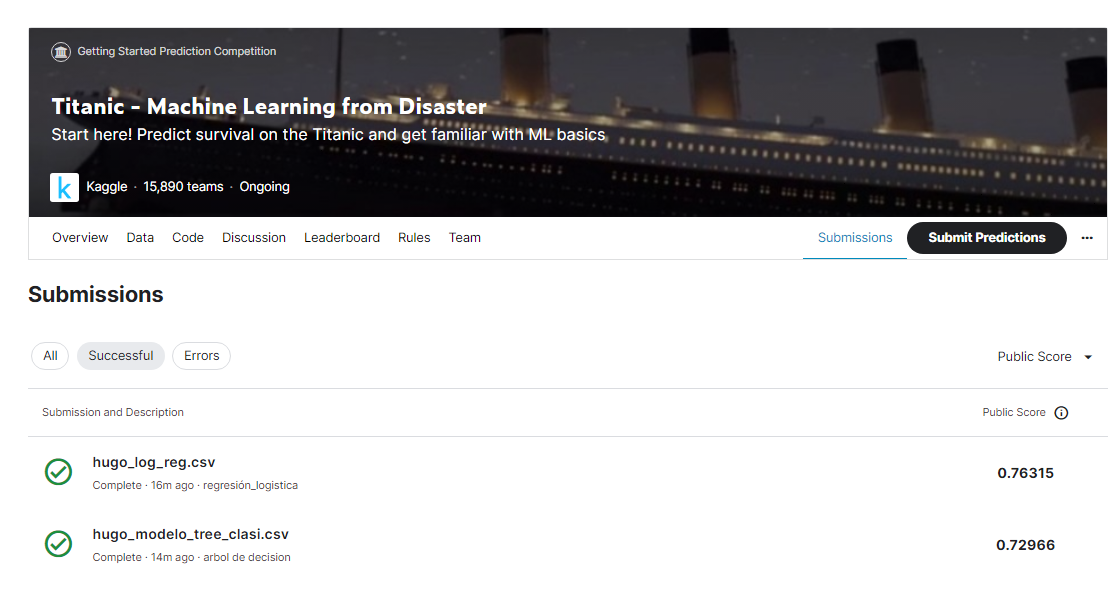

    De estos resultados nos quedaríamos con el modelo de regresión logística. Porque generaliza mejor las predicciones para datos con los que no se ha entrenado el modelo.

#### CONCLUCIONES
    - Importante del análisis exploratorio
    - Importante la limpieza de los datos
    - Probar varios modelos 
    - Calculo del error con el test_set
    - Aun faltan algunos pasos por realizar, pero se realizo casi un proceso de ciencia de datos, aun si queremos mejorar el modeo, podemos ir probando con un ajustes o añadir 
        columnas que no creiamos necesarias o quitando algunas, o probando con otros distintos modelos.

#### PROXIMOS PASOS

    Ahora, lo que vendría sería desplegar este modelo a producción, hacer predicciones según lo necesite el usuario, hacer seguimiento y realizar el mantenimiento del despliegue.

    Similar a como se describe superficialmente aquí https://cloud.google.com/ai-platform/docs/ml-solutions-overview

    Sin embargo, estás etapas corresponden abarcan pasos relacionados a la ingeniería de software o devops que no serán cubiertos en este notebook.